# Compute Expected Return of Two Assets

Imported Libraries:

In [1]:
import numpy as np
import pandas as pd
from statsmodels import regression
import matplotlib.pyplot as plt

Get some data:

In [55]:
start = '2017-03-10'
end = '2018-03-10'

#Look at returns of an asset one month into the future to model future returns 

offset_start_date = '2017-04-10'
offset_end_date = '2018-04-10'

# Get returns of two assets

asset1 = get_pricing('PEP', fields = 'price', start_date = offset_start_date, end_date = offset_end_date).pct_change()[1:]
asset2 = get_pricing('KO', fields = 'price', start_date = offset_start_date, end_date = offset_end_date).pct_change()[1:]

# Get returns of market (benchmark)

bench = get_pricing('SPY', fields = 'price', start_date = start, end_date = end).pct_change()[1:]

# Risk-free rate of return: Use ETF that tracks 3-month T-Bills

treasury_ret = get_pricing('BIL', fields = 'price', start_date = start, end_date = end).pct_change()[1:]

In [56]:
constant = pd.Series(np.ones(len(asset1.index)), index=asset1.index)

df = pd.DataFrame({'R1': asset1, 'R2': asset2, 'SPY': bench, 'RF': treasury_ret, 'Constant': constant})

df = df.dropna()

Compute static regressions over the two assets for the whole time period

In [57]:
OLS_model = regression.linear_model.OLS(df['R1'], df[['SPY', 'RF', 'Constant']])
fitted_model = OLS_model.fit()
print 'p-value: ', fitted_model.f_pvalue
print fitted_model.params
print fitted_model.summary()
R1_params = fitted_model.params

p-value:  4.00923789511e-11
SPY         0.491750
RF          3.993349
Constant   -0.000381
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                     R1   R-squared:                       0.190
Model:                            OLS   Adj. R-squared:                  0.183
Method:                 Least Squares   F-statistic:                     26.65
Date:                Fri, 11 May 2018   Prob (F-statistic):           4.01e-11
Time:                        07:49:33   Log-Likelihood:                 819.11
No. Observations:                 230   AIC:                            -1632.
Df Residuals:                     227   BIC:                            -1622.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------

In [58]:
OLS_model = regression.linear_model.OLS(df['R2'], df[['SPY', 'RF', 'Constant']])
fitted_model = OLS_model.fit()
print 'p-value: ', fitted_model.f_pvalue
print fitted_model.params
print fitted_model.summary()
R2_params = fitted_model.params

p-value:  2.30936878555e-15
SPY         0.544346
RF          3.684657
Constant   -0.000241
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                     R2   R-squared:                       0.257
Model:                            OLS   Adj. R-squared:                  0.250
Method:                 Least Squares   F-statistic:                     39.24
Date:                Fri, 11 May 2018   Prob (F-statistic):           2.31e-15
Time:                        07:49:33   Log-Likelihood:                 841.49
No. Observations:                 230   AIC:                            -1677.
Df Residuals:                     227   BIC:                            -1667.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------

Look at the 100-moving regression --> distribution of estimated coefficients and see if they are stable

Asset 1 (PEP):

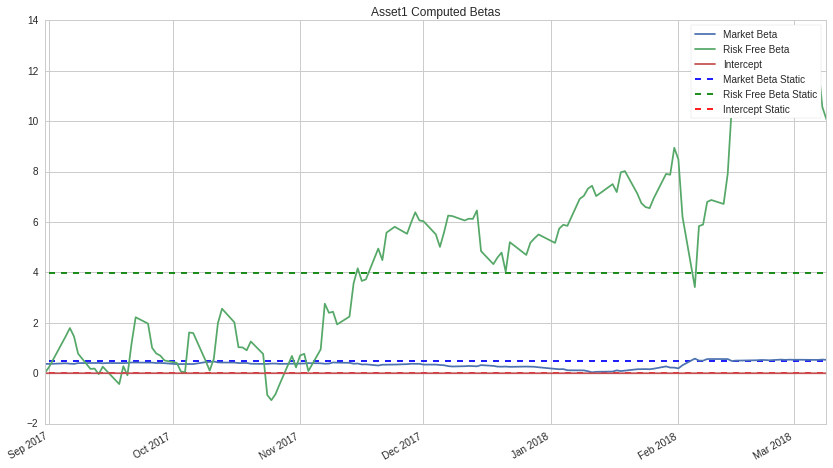

In [59]:
model = pd.stats.ols.MovingOLS(y = df['R1'], x=df[['SPY', 'RF']], 
                             window_type='rolling', 
                             window=100)
rolling_parameter_estimates = model.beta
rolling_parameter_estimates.plot();

plt.hlines(R1_params['SPY'], df.index[0], df.index[-1], linestyles='dashed', colors='blue')
plt.hlines(R1_params['RF'], df.index[0], df.index[-1], linestyles='dashed', colors='green')
plt.hlines(R1_params['Constant'], df.index[0], df.index[-1], linestyles='dashed', colors='red')

plt.title('Asset1 Computed Betas');
plt.legend(['Market Beta', 'Risk Free Beta', 'Intercept', 'Market Beta Static', 'Risk Free Beta Static', 'Intercept Static']);

Asset 2 (KO):

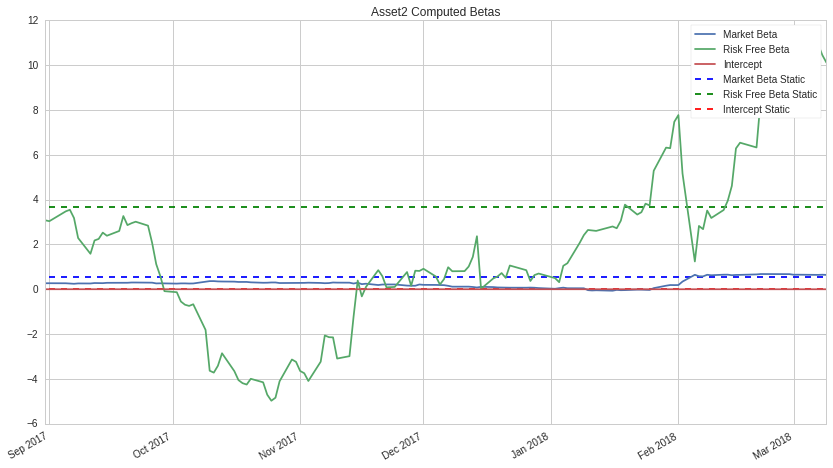

In [60]:
model = pd.stats.ols.MovingOLS(y = df['R2'], x=df[['SPY', 'RF']], 
                             window_type='rolling', 
                             window=100)
rolling_parameter_estimates = model.beta
rolling_parameter_estimates.plot();

plt.hlines(R2_params['SPY'], df.index[0], df.index[-1], linestyles='dashed', colors='blue')
plt.hlines(R2_params['RF'], df.index[0], df.index[-1], linestyles='dashed', colors='green')
plt.hlines(R2_params['Constant'], df.index[0], df.index[-1], linestyles='dashed', colors='red')

plt.title('Asset2 Computed Betas');
plt.legend(['Market Beta', 'Risk Free Beta', 'Intercept', 'Market Beta Static', 'Risk Free Beta Static', 'Intercept Static']);

Zooming into Asset 2's Beta to see whether or not it is actually stable

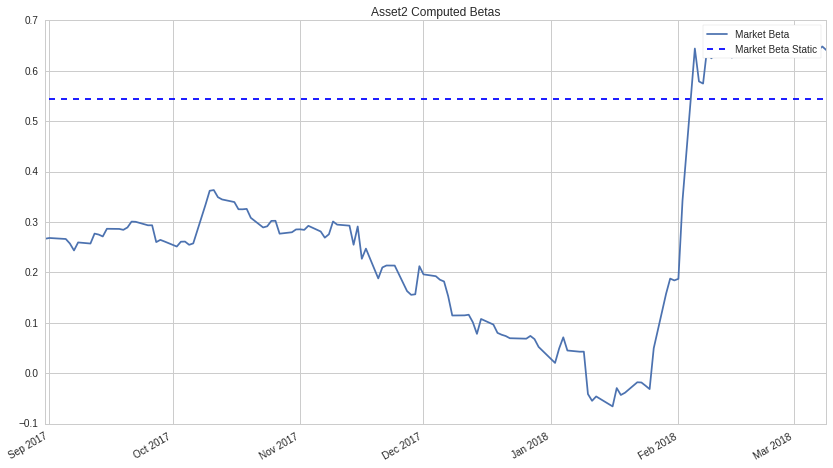

In [61]:
model = pd.stats.ols.MovingOLS(y = df['R2'], x=df[['SPY', 'RF']], 
                             window_type='rolling', 
                             window=100)
rolling_parameter_estimates = model.beta
rolling_parameter_estimates['SPY'].plot();

plt.hlines(R2_params['SPY'], df.index[0], df.index[-1], linestyles='dashed', colors='blue')

plt.title('Asset2 Computed Betas');
plt.legend(['Market Beta', 'Market Beta Static']);

Conclusion: Plot scale massively affects how we perceive estimated quality

## Use APT to Model Future Stock Prices

In [62]:
start = '2017-04-10'
end = '2018-04-10'

#Look at returns of an asset one month into the future to model future returns 

offset_start_date = '2017-05-10'
offset_end_date = '2018-05-10'

# Get returns of two assets

asset1 = get_pricing('HSC', fields = 'price', start_date = offset_start_date, end_date = offset_end_date).pct_change()[1:]
asset2 = get_pricing('MSFT', fields = 'price', start_date = offset_start_date, end_date = offset_end_date).pct_change()[1:]

# Get returns of market (benchmark)

bench = get_pricing('SPY', fields = 'price', start_date = start, end_date = end).pct_change()[1:]

# Risk-free rate of return: Use ETF that tracks 3-month T-Bills

treasury_ret = get_pricing('BIL', fields = 'price', start_date = start, end_date = end).pct_change()[1:]

constant = pd.Series(np.ones(len(asset1.index)), index=asset1.index)

df = pd.DataFrame({'R1': asset1, 'R2': asset2, 'SPY': bench, 'RF': treasury_ret, 'Constant': constant})

df = df.dropna()

In [63]:
OLS_model = regression.linear_model.OLS(df['R1'], df[['SPY', 'RF', 'Constant']])
fitted_model = OLS_model.fit()
print 'p-value', fitted_model.f_pvalue
print fitted_model.params

b_SPY = fitted_model.params['SPY']
b_RF = fitted_model.params['RF']
a = fitted_model.params['Constant']

p-value 3.74283505742e-12
SPY          1.558358
RF         -17.048745
Constant     0.001617
dtype: float64


In [64]:
start_date = '2018-04-10'
end_date = '2018-05-10'

# Get returns for the market
last_month_bench = get_pricing('SPY', fields='price', start_date=start_date, end_date=end_date).pct_change()[1:]
# Use an ETF that tracks 3-month T-bills as our risk-free rate of return
last_month_treasury_ret = get_pricing('BIL', fields='price', start_date=start_date, end_date=end_date).pct_change()[1:]

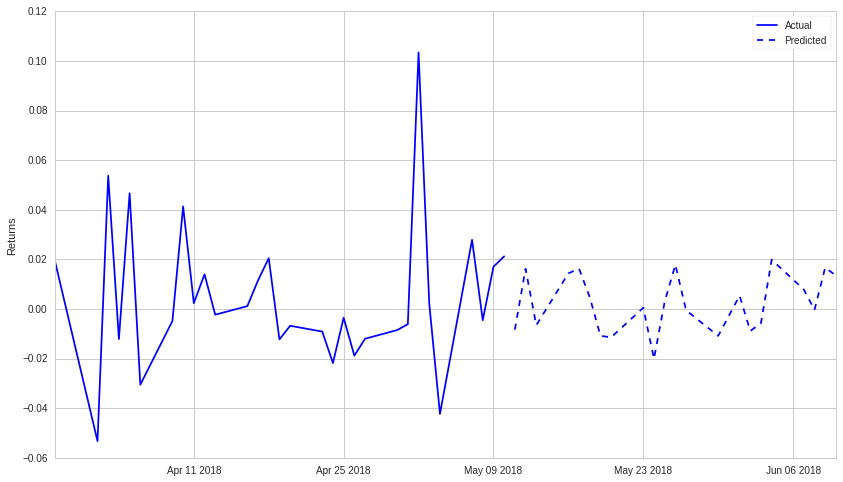

In [65]:
predictions = b_SPY * last_month_bench + b_RF * last_month_treasury_ret + a
predictions.index = predictions.index + pd.DateOffset(months=1)

plt.plot(asset1.index[-30:], asset1.values[-30:], 'b-')
plt.plot(predictions.index, predictions, 'b--')
plt.ylabel('Returns')
plt.legend(['Actual', 'Predicted']);

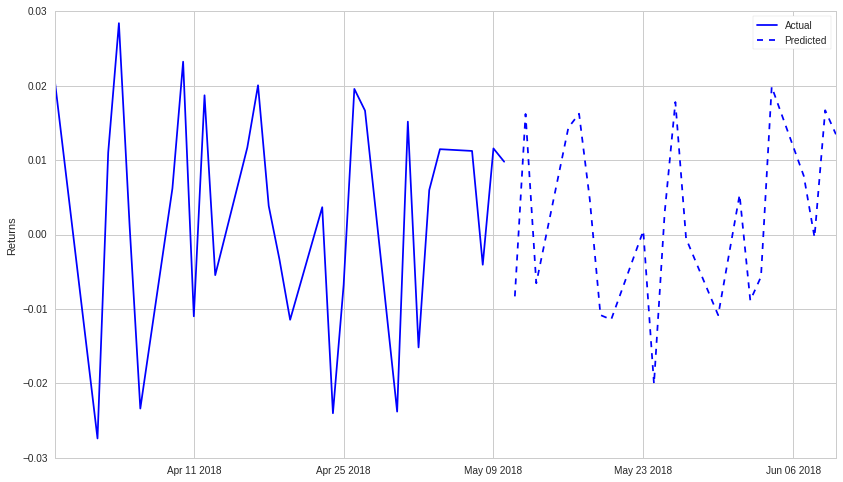

In [66]:
predictions = b_SPY * last_month_bench + b_RF * last_month_treasury_ret + a
predictions.index = predictions.index + pd.DateOffset(months=1)

plt.plot(asset2.index[-30:], asset2.values[-30:], 'b-')
plt.plot(predictions.index, predictions, 'b--')
plt.ylabel('Returns')
plt.legend(['Actual', 'Predicted']);